Import dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model,Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,BatchNormalization,Flatten,GlobalAveragePooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.utils import load_img,img_to_array
import numpy as np
import os

In [2]:
#specify main dataset path

main_dir = os.listdir('chest_xray')
print(main_dir)

['chest_xray', 'test', 'train', 'val', '__MACOSX']


In [3]:
train_dir = 'chest_xray/train'
test_dir = 'chest_xray/test'
val_dir = 'chest_xray/val'

In [12]:
#Image Data Generator

img_size = (128,128)
batch_size =10

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir,target_size=img_size,class_mode='binary',batch_size=batch_size)

test_gen = test_datagen.flow_from_directory(test_dir,target_size=img_size,class_mode='binary',batch_size=batch_size,shuffle=False)

val_gen = test_datagen.flow_from_directory(val_dir,target_size=img_size,class_mode='binary',batch_size=batch_size)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


EFFCIENTNETB3

In [5]:
from tensorflow.keras.applications import EfficientNetB3

base_model = EfficientNetB3(include_top=False,weights='imagenet',input_shape=(224,224,3))

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(1,activation='sigmoid')(x)

model_eff = Model(inputs=base_model.input,outputs= output)

model_eff.compile(optimizer = Adam(1e-4),loss = 'binary_crossentropy',metrics = ['accuracy'])

history_eff = model_eff.fit(train_gen,epochs = 10, verbose = 1,validation_data = val_gen)

C:\Users\Raiyyan LUCKY\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6547 - loss: 0.6292

C:\Users\Raiyyan LUCKY\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.6551 - loss: 0.6290 - val_accuracy: 0.5000 - val_loss: 0.8430
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.7489 - loss: 0.5684 - val_accuracy: 0.5000 - val_loss: 0.8331
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.7452 - loss: 0.5692 - val_accuracy: 0.5000 - val_loss: 0.8212
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.7430 - loss: 0.5712 - val_accuracy: 0.5000 - val_loss: 0.8292
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.7453 - loss: 0.5704 - val_accuracy: 0.5000 - val_loss: 0.8166
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.7468 - loss: 0.5618 - val_accuracy: 0.5000 - val_loss: 0.8250
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.7425 - loss: 0.5687 - val_accuracy: 0.5000 - val_loss: 0.8203
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.7417 - loss: 0.5693 - val_accuracy: 0.500

In [14]:
import matplotlib.pyplot as plt
def predict_penumonia_eff(img_path):
    img = load_img(img_path, target_size=(224, 224))  # ✅ resize here
    x = img_to_array(img)
    x /= 255.0
    x = np.expand_dims(x, axis=0)
    
    prediction = model_eff.predict(x)
    
    plt.imshow(img)
    plt.axis('off')
    
    if prediction[0][0] > 0.5:
        print('🔴 THE PERSON HAS PNEUMONIA')
    else:
        print('🟢 THE PERSON IS NORMAL')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
🔴 THE PERSON HAS PNEUMONIA


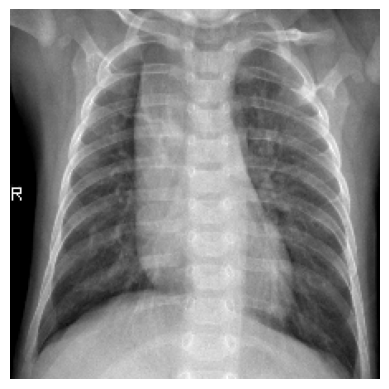

In [15]:
predict_penumonia_eff('chest_xray/test/NORMAL/NORMAL2-IM-0360-0001.jpeg')

In [16]:
loss, accuracy = model_eff.evaluate(test_gen)
print(f" EFFICIENTNET Test Accuracy: {accuracy * 100:.2f}%")

C:\Users\Raiyyan LUCKY\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.2984 - loss: 1.0600
 EFFICIENTNET Test Accuracy: 62.50%


DENSENET121

In [16]:
from tensorflow.keras.applications import DenseNet121

base_model_d = DenseNet121(include_top=False,weights='imagenet',input_shape=(128,128,3))

base_model_d.trainable = False

x = base_model_d.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(1,activation='sigmoid')(x)

model_dense = Model(inputs=base_model_d.input,outputs= output)

model_dense.compile(optimizer = Adam(1e-4),loss = 'binary_crossentropy',metrics = ['accuracy'])

history_dense = model_dense.fit(train_gen,epochs = 20, verbose = 1,validation_data = val_gen)

Epoch 1/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 99s 172ms/step - accuracy: 0.5898 - loss: 0.9152 - val_accuracy: 0.5625 - val_loss: 0.6480
Epoch 2/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 85s 163ms/step - accuracy: 0.7756 - loss: 0.5018 - val_accuracy: 0.6875 - val_loss: 0.5375
Epoch 3/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 90s 172ms/step - accuracy: 0.8263 - loss: 0.3881 - val_accuracy: 0.8125 - val_loss: 0.4272
Epoch 4/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 89s 171ms/step - accuracy: 0.8580 - loss: 0.3416 - val_accuracy: 0.7500 - val_loss: 0.4466
Epoch 5/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 84s 160ms/step - accuracy: 0.8705 - loss: 0.3055 - val_accuracy: 0.6875 - val_loss: 0.4944
Epoch 6/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 85s 163ms/step - accuracy: 0.8747 - loss: 0.2775 - val_accuracy: 0.7500 - val_loss: 0.4188
Epoch 7/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 85s 163ms/step - accuracy: 0.8950 - loss: 0.2555 - val_accuracy: 0.6875 - val_loss: 0.4923
Epoch 8/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 84s 160ms/step - accuracy: 0.8986 - loss: 0

In [20]:
def predict_penumonia_dense(img_path):
    x = load_img(img_path,target_size=(128,128))
    x = img_to_array(x)
    x /= 255
    x = np.expand_dims(x,axis=0)
    prediction = model_dense.predict(x,batch_size=10)
    if prediction > 0.5:
        print('THE PERSON HAS PNEUMONIA')
    else:
        print('THE PERSON IS NORMAL')

In [21]:
predict_penumonia_dense('chest_xray/test/NORMAL/NORMAL2-IM-0360-0001.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
THE PERSON IS NORMAL


In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         921,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 931,809 (3.55 MB)

 Trainable params: 931,809 (3.55 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
history = model.fit(train_gen,epochs=10,verbose=1,validation_data=val_gen)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.7189 - loss: 0.6292

C:\Users\Raiyyan LUCKY\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


261/261 ━━━━━━━━━━━━━━━━━━━━ 115s 433ms/step - accuracy: 0.7192 - loss: 0.6285 - val_accuracy: 0.8750 - val_loss: 0.4219
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 58s 224ms/step - accuracy: 0.8919 - loss: 0.2600 - val_accuracy: 0.6875 - val_loss: 0.7227
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 61s 234ms/step - accuracy: 0.8983 - loss: 0.2352 - val_accuracy: 0.9375 - val_loss: 0.3445
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 63s 240ms/step - accuracy: 0.9103 - loss: 0.2140 - val_accuracy: 0.6875 - val_loss: 0.9070
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 61s 232ms/step - accuracy: 0.9231 - loss: 0.1972 - val_accuracy: 0.6250 - val_loss: 1.0820
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 60s 230ms/step - accuracy: 0.9208 - loss: 0.1943 - val_accuracy: 0.6875 - val_loss: 0.6522
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 60s 231ms/step - accuracy: 0.9298 - loss: 0.1781 - val_accuracy: 0.8750 - val_loss: 0.3325
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 60s 229ms/step - accuracy: 0.9378 - loss: 0.1606 - va

In [4]:
from keras.utils import load_img,img_to_array
import numpy as np

In [5]:
def predict_pneumonia(img_path):
    x = load_img(img_path,target_size=(128,128,3))
    x = img_to_array(x)
    x /= 255
    x = np.expand_dims(x,axis=0)
    predict = model.predict(x,batch_size=10)
    if predict > 0.5:
        print('PNEUMONIA')
    else:
        print('NORMAL')

In [ ]:
predict_pneumonia('chest_xray/test/NORMAL/NORMAL2-IM-0252-0001.jpeg')

In [ ]:
chest_xray/test/NORMAL/NORMAL2-IM-0360-0001.jpeg